In [174]:
import numpy as np

import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

from scipy import stats

matplotlib.rc('font', family = "NanumGothic")
matplotlib.rcParams['axes.unicode_minus'] = False

In [6]:
df_order = pd.read_csv("log_order_sheet_001.csv")

df_order.head(5)

,Unnamed: 0,결제수단,공급원가,교환구분,네이버 포인트,배송번호,배송비 정보,배송시작일,배송완료일,사용한 적립금액,...,주문자ID,카드사,쿠폰 할인금액,판매가,품목번호,친환경,사은품,회원,주문수량,총수량
0,0,무통장입금,44550.0,교환안함,0,D-20181227-0000648-00,무료,2019-01-07 오전 8:56,2019-01-11 오전 5:32,0,...,pp683,기타,0,71450,42602,False,False,True,1,300
1,1,무통장입금,44000.0,교환안함,0,D-20181229-0000119-00,무료,2019-01-03 오전 9:30,2019-01-07 오전 5:32,0,...,asd0908,기타,0,70620,42930,False,False,True,2,2000
2,2,무통장입금,6820.0,교환안함,0,D-20181230-0000100-00,무료,2019-01-03 오전 9:30,2019-01-07 오전 5:32,0,...,NaN,기타,0,13910,42998,False,False,False,1,200
3,3,무통장입금,49500.0,교환안함,0,D-20181231-0000087-00,무료,2019-01-03 오전 9:30,2019-01-07 오전 5:32,0,...,23533593@n,기타,0,81600,43063,False,False,True,1,300
4,4,무통장입금,61600.0,교환안함,0,D-20181231-0000108-00,무료,2019-01-07 오전 8:56,2019-01-11 오전 5:32,0,...,romandoll,기타,0,94710,43066,False,False,True,1,400


In [7]:
df_order.columns

Index(['Unnamed: 0', '결제수단', '공급원가', '교환구분', '네이버 포인트', '배송번호', '배송비 정보',
       '배송시작일', '배송완료일', '사용한 적립금액', '상품구매금액', '상품명', '상품번호', '상품별 추가할인금액',
       '수령인 주소', '주문경로', '주문번호', '주문일시', '주문자ID', '카드사', '쿠폰 할인금액', '판매가',
       '품목번호', '친환경', '사은품', '회원', '주문수량', '총수량'],
      dtype='object')

# 결제수단 처리

In [26]:
df_payment = df_order["결제수단"]

df_payment.unique()

array(['무통장입금', '적립금,무통장입금', '카드', '적립금', '휴대폰', '적립금,가상계좌', '적립금,카드',
       '가상계좌', '쿠폰,카드', '예치금', '예치금,적립금,무통장입금', '쿠폰,무통장입금',
       '페이나우(실시간 계좌이체)', '예치금,무통장입금', '실시간계좌이체', '페이나우(카드)', '카드,무통장입금',
       '예치금,쿠폰,무통장입금', '예치금,카드', '카카오페이(카드)', '카카오페이(카카오머니)',
       '적립금,카카오페이(카카오머니)', '쿠폰,예치금', '적립금,카카오페이(카드)', '쿠폰,가상계좌',
       '적립금,페이나우(카드)', '적립금,카드,무통장입금', '적립금,페이나우(실시간 계좌이체)', '예치금,적립금,카드',
       '에스크로(실시간계좌이체)', '쿠폰,휴대폰', '적립금,휴대폰', '쿠폰,페이나우(카드)',
       '쿠폰,에스크로(실시간계좌이체)', '쿠폰,카드,무통장입금', '무통장입금,휴대폰', '페이나우(카드),무통장입금',
       '쿠폰,카카오페이(카드)', '예치금,쿠폰,카드', '무통장입금,실시간계좌이체', '예치금,휴대폰',
       '적립금,실시간계좌이체', '에스크로(가상계좌)', '예치금,실시간계좌이체'], dtype=object)

In [48]:
무통장입금_flag = []
적립금_flag = []
카드_flag = []
휴대폰_flag = []
가상계좌_flag = []
쿠폰_flag = []
예치금_flag = []
실시간계좌이체_flag = []


for payments in df_payment:
    #print(payment)
    
    payment_list = payments.split(',')
    
    if "무통장입금" in payment_list:
        무통장입금_flag.append(True)
    else:
        무통장입금_flag.append(False)
        
    if "적립금" in payment_list:
        적립금_flag.append(True)
    else:
        적립금_flag.append(False)
        
    if "카드" in payment_list:
        카드_flag.append(True)
    elif "카카오머니" in payment_list:
        카드_flag.append(True)
    else:
        카드_flag.append(False)
        
    if "휴대폰" in payment_list:
        휴대폰_flag.append(True)
    else:
        휴대폰_flag.append(False)
        
    if "가상계좌" in payment_list:
        가상계좌_flag.append(True)
    else:
        가상계좌_flag.append(False)
        
    if "쿠폰" in payment_list:
        쿠폰_flag.append(True)
    else:
        쿠폰_flag.append(False)
        
    if "예치금" in payment_list:
        예치금_flag.append(True)
    else:
        예치금_flag.append(False)
        
    if "실시간계좌이체" in payment_list:
        실시간계좌이체_flag.append(True)
    elif "실시간 계좌이체" in payment_list:
        실시간계좌이체_flag.append(True)
    else:
        실시간계좌이체_flag.append(False)

In [49]:
len(무통장입금_flag)

무통장입금_flag

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 False,
 True,
 T

In [50]:
len(적립금_flag)

46749

In [51]:
len(카드_flag)

카드_flag

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,


In [52]:
len(휴대폰_flag)

46749

In [53]:
len(가상계좌_flag)

46749

In [54]:
len(쿠폰_flag)

46749

In [55]:
len(예치금_flag)

46749

In [56]:
len(실시간계좌이체_flag)

46749

In [57]:
df_order["결제수단"]

0        무통장입금
1        무통장입금
2        무통장입금
3        무통장입금
4        무통장입금
         ...  
46744       카드
46745       카드
46746       카드
46747       카드
46748       카드
Name: 결제수단, Length: 46749, dtype: object

# 결제수단 파생변수 : 각 결제수단에 따른 flag

In [58]:
np_무통장입금 = np.array(무통장입금_flag)
np_적립금 = np.array(적립금_flag)
np_카드 = np.array(카드_flag)
np_휴대폰 = np.array(휴대폰_flag)
np_가상계좌 = np.array(가상계좌_flag)
np_쿠폰 = np.array(쿠폰_flag)
np_예치금 = np.array(예치금_flag)
np_실시간계좌이체 = np.array(실시간계좌이체_flag)

In [61]:
df_무통장입금 = pd.DataFrame(np_무통장입금)
df_적립금 = pd.DataFrame(np_적립금)
df_카드 = pd.DataFrame(np_카드)
df_휴대폰 = pd.DataFrame(np_휴대폰)
df_가상계좌 = pd.DataFrame(np_가상계좌)
df_쿠폰 = pd.DataFrame(np_쿠폰)
df_예치금 = pd.DataFrame(np_예치금)
df_실시간계좌이체 = pd.DataFrame(np_실시간계좌이체)

In [62]:
df_order["무통장입금"] = df_무통장입금
df_order["적립금"] = df_적립금
df_order["카드"] = df_카드
df_order["휴대폰"] = df_휴대폰
df_order["가상계좌"] = df_가상계좌
df_order["쿠폰"] = df_쿠폰
df_order["예치금"] = df_예치금
df_order["실시간계좌이체"] = df_실시간계좌이체

In [64]:
df_order.head(10)

,Unnamed: 0,결제수단,공급원가,교환구분,네이버 포인트,배송번호,배송비 정보,배송시작일,배송완료일,사용한 적립금액,...,주문수량,총수량,무통장입금,적립금,카드,휴대폰,가상계좌,쿠폰,예치금,실시간계좌이체
0,0,무통장입금,44550.0,교환안함,0,D-20181227-0000648-00,무료,2019-01-07 오전 8:56,2019-01-11 오전 5:32,0,...,1,300,True,False,False,False,False,False,False,False
1,1,무통장입금,44000.0,교환안함,0,D-20181229-0000119-00,무료,2019-01-03 오전 9:30,2019-01-07 오전 5:32,0,...,2,2000,True,False,False,False,False,False,False,False
2,2,무통장입금,6820.0,교환안함,0,D-20181230-0000100-00,무료,2019-01-03 오전 9:30,2019-01-07 오전 5:32,0,...,1,200,True,False,False,False,False,False,False,False
3,3,무통장입금,49500.0,교환안함,0,D-20181231-0000087-00,무료,2019-01-03 오전 9:30,2019-01-07 오전 5:32,0,...,1,300,True,False,False,False,False,False,False,False
4,4,무통장입금,61600.0,교환안함,0,D-20181231-0000108-00,무료,2019-01-07 오전 8:56,2019-01-11 오전 5:32,0,...,1,400,True,False,False,False,False,False,False,False
5,5,무통장입금,42900.0,교환안함,0,D-20181231-0000108-01,무료,2019-01-07 오전 8:56,2019-01-11 오전 5:32,0,...,1,300,True,False,False,False,False,False,False,False
6,6,무통장입금,51700.0,교환안함,0,D-20181231-0000184-00,무료,2019-01-03 오전 9:30,2019-01-07 오전 5:32,0,...,1,1000,True,False,False,False,False,False,False,False
7,7,무통장입금,34650.0,교환안함,0,D-20181231-0000184-01,무료,2019-01-03 오전 9:30,2019-01-07 오전 5:32,0,...,1,300,True,False,False,False,False,False,False,False
8,8,무통장입금,42900.0,교환안함,0,D-20181231-0000184-02,무료,2019-01-03 오전 9:30,2019-01-07 오전 5:32,0,...,4,1200,True,False,False,False,False,False,False,False
9,9,무통장입금,79200.0,교환안함,0,D-20181231-0000184-03,무료,2019-01-03 오전 9:30,2019-01-07 오전 5:32,0,...,1,400,True,False,False,False,False,False,False,False


In [65]:
df_payment = df_order[["무통장입금", "적립금", "카드", "휴대폰", "가상계좌", "쿠폰", "실시간계좌이체"]]

In [72]:
df_payment.head(30)

,무통장입금,적립금,카드,휴대폰,가상계좌,쿠폰,실시간계좌이체
0,True,False,False,False,False,False,False
1,True,False,False,False,False,False,False
2,True,False,False,False,False,False,False
3,True,False,False,False,False,False,False
4,True,False,False,False,False,False,False
5,True,False,False,False,False,False,False
6,True,False,False,False,False,False,False
7,True,False,False,False,False,False,False
8,True,False,False,False,False,False,False
9,True,False,False,False,False,False,False


In [70]:
df_order["결제수단"].head(30)

0         무통장입금
1         무통장입금
2         무통장입금
3         무통장입금
4         무통장입금
5         무통장입금
6         무통장입금
7         무통장입금
8         무통장입금
9         무통장입금
10        무통장입금
11        무통장입금
12        무통장입금
13        무통장입금
14        무통장입금
15        무통장입금
16        무통장입금
17        무통장입금
18        무통장입금
19        무통장입금
20        무통장입금
21    적립금,무통장입금
22        무통장입금
23        무통장입금
24        무통장입금
25        무통장입금
26        무통장입금
27    적립금,무통장입금
28    적립금,무통장입금
29    적립금,무통장입금
Name: 결제수단, dtype: object

In [78]:
df_무통장입금[0].value_counts()

True     29104
False    17645
Name: 0, dtype: int64

In [79]:
df_적립금[0].value_counts()

False    41931
True      4818
Name: 0, dtype: int64

In [80]:
df_카드[0].value_counts()

False    30309
True     16440
Name: 0, dtype: int64

In [81]:
df_휴대폰[0].value_counts()

False    46201
True       548
Name: 0, dtype: int64

In [82]:
df_쿠폰[0].value_counts()

False    44111
True      2638
Name: 0, dtype: int64

In [83]:
df_실시간계좌이체[0].value_counts()

False    46418
True       331
Name: 0, dtype: int64

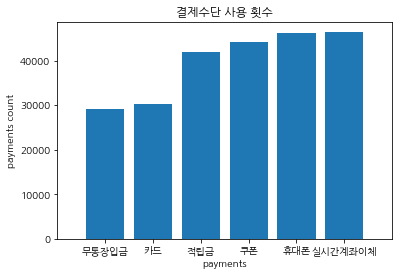

In [107]:
p_name = ["무통장입금", "카드", "적립금", "쿠폰", "휴대폰", "실시간계좌이체"]
p_count = [29104, 30309, 41931, 44111, 46201, 46418]

n_groups = len(p_name)
index = np.arange(n_groups)

plt.bar(index, p_count, tick_label=p_name, align='center')

plt.xlabel('payments')
plt.ylabel('payments count')
plt.title('결제수단 사용 횟수')
plt.xlim( -1, n_groups)
plt.show()


<function matplotlib.pyplot.show(*args, **kw)>

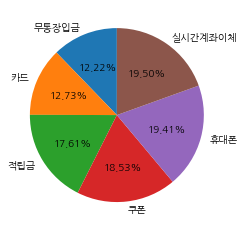

In [168]:
labels = ["무통장입금", "카드", "적립금", "쿠폰", "휴대폰", "실시간계좌이체"]
ratio = [29104/46749, 30309/46749, 41931/46749, 44111/46749, 46201/46749, 46418/46749]

plt.pie(ratio, labels= labels, autopct = "%1.2f%%", shadow= False, startangle= 90)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

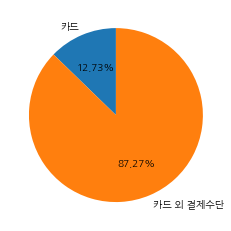

In [164]:
labels = ["카드", "카드 외 결제수단"]
ratio = [30309/46749, (29104+41931+44111+46201+46418)/46749]

plt.pie(ratio, labels= labels, autopct = "%1.2f%%", shadow= False, startangle= 90)
plt.show

In [180]:
df_카드결제 = df_order[df_order["카드사"] != "기타"]
df_카드외결제 = df_order[df_order["카드사"] == "기타"]

t_result = stats.ttest_ind(df_order["카드사"] != "기타", df_order["카드사"] == "기타")
t, p = t_result.statistic.round(3), t_result.pvalue.round(10)
print("2-Sample t-test")
print(t_result)
print("t : {}".format(t))
print("p : {}".format(p)) # < 0.05

2-Sample t-test
Ttest_indResult(statistic=-121.48310834765313, pvalue=0.0)
t : -121.483
p : 0.0


In [120]:
df_카드사비율

기타               0.684614
삼성               0.067766
신한(구.LG카드 포함)    0.064686
현대               0.047466
비씨               0.040364
국민               0.031530
NH (농협)          0.023872
롯데               0.019466
하나SK             0.007487
외환               0.005048
씨티               0.003529
카카오뱅크            0.001497
광주               0.000834
신한               0.000620
신협               0.000449
전북               0.000364
제주               0.000235
수협               0.000107
국내아멕스            0.000064
Name: 카드사, dtype: float64

In [133]:
카드사_list = df_order["카드사"].unique().tolist()
카드사_list

['기타',
 '현대',
 'NH (농협)',
 '국민',
 '삼성',
 '비씨',
 '롯데',
 '신한(구.LG카드 포함)',
 '광주',
 '외환',
 '씨티',
 '카카오뱅크',
 '하나SK',
 '수협',
 '전북',
 '제주',
 '신협',
 '국내아멕스',
 '신한']

In [118]:
df_order["카드사"].value_counts()

기타               32005
삼성                3168
신한(구.LG카드 포함)     3024
현대                2219
비씨                1887
국민                1474
NH (농협)           1116
롯데                 910
하나SK               350
외환                 236
씨티                 165
카카오뱅크               70
광주                  39
신한                  29
신협                  21
전북                  17
제주                  11
수협                   5
국내아멕스                3
Name: 카드사, dtype: int64

In [134]:
3168+ 3024+ 2219+ 1887+ 1474+ 1116+ 910

13798

['삼성', '신한', '현대', '비씨', '국민', '농협', '롯데']


<function matplotlib.pyplot.show(*args, **kw)>

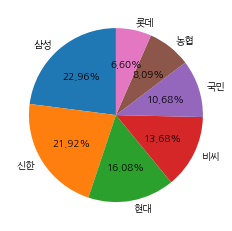

In [135]:
labels = ["삼성","신한","현대","비씨","국민","농협","롯데"]
ratio = [3168/13798, 3024/13798, 2219/13798, 1887/13798, 1474/13798, 1116/13798, 910/13798]

print(labels)

plt.pie(ratio, labels= labels, autopct = "%1.2f%%", shadow= False, startangle= 90)
plt.show

In [136]:
df_카드구매 = df_order[df_order["카드사"] != "기타"]

In [139]:
df_카드구매["카드사"]

33            현대
37            현대
38            현대
39            현대
45       NH (농협)
          ...   
46725         롯데
46736         비씨
46744         국민
46745         비씨
46748    NH (농협)
Name: 카드사, Length: 14744, dtype: object

In [140]:
df_삼성카드 = df_카드구매[df_카드구매["카드사"] == "삼성"]

In [142]:
df_삼성카드.columns

Index(['Unnamed: 0', '결제수단', '공급원가', '교환구분', '네이버 포인트', '배송번호', '배송비 정보',
       '배송시작일', '배송완료일', '사용한 적립금액', '상품구매금액', '상품명', '상품번호', '상품별 추가할인금액',
       '수령인 주소', '주문경로', '주문번호', '주문일시', '주문자ID', '카드사', '쿠폰 할인금액', '판매가',
       '품목번호', '친환경', '사은품', '회원', '주문수량', '총수량', '무통장입금', '적립금', '카드', '휴대폰',
       '가상계좌', '쿠폰', '예치금', '실시간계좌이체'],
      dtype='object')

In [150]:
삼성카드판매총액 = df_삼성카드["판매가"].sum()
삼성카드판매총액

186044990

In [146]:
df_신한카드 = df_카드구매[df_카드구매["카드사"] == "신한"]

In [151]:
신한카드판매총액 = df_신한카드["판매가"].sum()
신한카드판매총액

1312960

In [152]:
df_현대카드 = df_카드구매[df_카드구매["카드사"] == "현대"]
현대카드판매총액 = df_현대카드["판매가"].sum()
현대카드판매총액

129928360

In [154]:
df_비씨카드 = df_카드구매[df_카드구매["카드사"] == "비씨"]
비씨카드판매총액 = df_비씨카드["판매가"].sum()
비씨카드판매총액

106439760

In [155]:
df_국민카드 = df_카드구매[df_카드구매["카드사"] == "국민"]
국민카드판매총액 = df_국민카드["판매가"].sum()
국민카드판매총액

84213600

In [160]:
df_농협카드 = df_카드구매[df_카드구매["카드사"] == "NH (농협)"]
농협카드판매총액 = df_농협카드["판매가"].sum()
농협카드판매총액

63193390

In [158]:
df_롯데카드 = df_카드구매[df_카드구매["카드사"] == "롯데"]
롯데카드판매총액 = df_롯데카드["판매가"].sum()
롯데카드판매총액

53829570

In [162]:
카드판매총액 = 삼성카드판매총액 + 신한카드판매총액 + 현대카드판매총액 + 비씨카드판매총액 + 국민카드판매총액 + 농협카드판매총액 + 롯데카드판매총액

카드판매총액

624962630

['삼성', '신한', '현대', '비씨', '국민', '농협', '롯데']


<function matplotlib.pyplot.show(*args, **kw)>

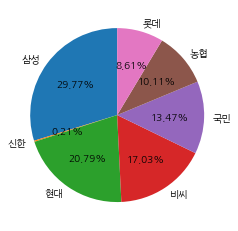

In [163]:
labels = ["삼성","신한","현대","비씨","국민","농협","롯데"]
ratio = [삼성카드판매총액/카드판매총액, 신한카드판매총액/카드판매총액, 현대카드판매총액/카드판매총액, 비씨카드판매총액/카드판매총액, 국민카드판매총액/카드판매총액, 농협카드판매총액/카드판매총액, 롯데카드판매총액/카드판매총액]

print(labels)

plt.pie(ratio, labels= labels, autopct = "%1.2f%%", shadow= False, startangle= 90)
plt.show

# 카드사 인사이트 ! : 신한카드 마케팅 접자!